## Deboost Bubbles

In [1]:
%matplotlib inline

In [2]:
import os,sys
sys.path.append('./bubbles_codes/')
from plotting import *
from bubble_tools import *
from experiment import *

In [10]:
tmp = 0
phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
exp_params = np.asarray([nLat, lamb, phi0, temp])
print('Looking at at lambda, T, phi0, m2, sigma:', lamb, temp, phi0, m2(lamb), sigmafld)

amp_thresh  = right_Vmax.x + 2.*sigmafld
crit_thresh = right_Vmax.x + 2.*sigmafld
tv_thresh   = right_Vmax.x + 2.*sigmafld
crit_rad    = 100

path = decay_times_file(*exp_params, minSim, maxSim, nTimeMAX)
if os.path.exists(path):
    print(path)
    decay_times = np.load(path)

    minDecTime = nLat//10
    alltimes   = decay_times[:,1]
    simList2Do = decay_times[alltimes>=minDecTime, 0]

    remain = []
    for sim in simList2Do:
        path2RESTsim = rest_sim_location(*exp_params, sim)
        if not os.path.exists(path2RESTsim):
            
            path2CLEANsim = clean_sim_location(*exp_params, sim)
            if os.path.exists(path2CLEANsim):
                remain.append(sim)

   # print('Remaining sims to compute:', remain)
    print('Totalling:', len(remain))

Looking at at lambda, T, phi0, m2, sigma: 1.5 1.5 1.9039955476301778 0.01 0.4709803154474452


In [12]:
if False:
    np.save('./plots/leftover_sims_2do_'+batch_params(*exp_params), remain)

remain2check = np.load('./plots/leftover_sims_2do_'+batch_params(*exp_params)+'.npy')
print(len(remain2check))

FileNotFoundError: [Errno 2] No such file or directory: './plots/leftover_sims_2do_x2048_phi01.9040_lambda1.5000_T1.5000.npy'

In [13]:
if True:
    donelist = []
    for sim in remain2check:
        path2RESTsim = rest_sim_location(*exp_params, sim)
        if os.path.exists(path2RESTsim):
            print('Sim', sim)
            sim, bubble, totbeta = np.load(path2RESTsim)
            donelist.append(sim)
            print('had total vel:', totbeta)

            if True:
                crit_rad = 50
                crit_thresh = right_Vmax.x + 2.*sigmafld
                win = 150

                tcen, xcen = find_nucleation_center(bubble[0], phieq, crit_thresh, crit_rad)
                nT, nN = np.shape(bubble[0])
                tl,tr = max(0, tcen-win), min(nT-1, tcen+win)
                xl,xr = max(0, xcen-win), min(nN-1, xcen+win)

                fig, ax = plt.subplots(1, 1, figsize = (8, 5))
                ext = [xl,xr,tl,tr]
                im = plt.imshow(bubble[0,tl:tr,xl:xr], interpolation='none', extent=ext, origin='lower', cmap='RdBu')
                clb = plt.colorbar(im, ax = ax)
                plt.grid(True, ls='--', color='darkgray')
                plt.title('Simulation '+str(sim))
                plt.plot(xcen,tcen,'bo')
                plt.xlabel('x'); plt.ylabel('t')
                plt.show()


NameError: name 'remain2check' is not defined

In [14]:
for sim in []:
    path2RESTsim = rest_sim_location(*exp_params, sim)
    if os.path.exists(path2RESTsim):
        os.remove(path2RESTsim)

In [14]:
if False:
    for sim in remain:
        path2CLEANsim = clean_sim_location(*exp_params, sim)
        bubble, sim, tdecay, outcome = np.load(path2CLEANsim)
        nC, nT, nN = np.shape(bubble)

        fig, ax = plt.subplots(1, 1, figsize = (8, 5))
        ext = [0, nN, 0, nT]
        im  = plt.imshow(bubble[0], interpolation='none', extent=ext, origin='lower', cmap='RdBu')
        clb = plt.colorbar(im, ax = ax)
        plt.grid(True, ls='--', color='darkgray')
        plt.title('Simulation '+str(sim))
        plt.xlabel('x'); plt.ylabel('t')
        plt.show()


In [15]:
for sim in []:
    path2CLEANsim = clean_sim_location(*exp_params, sim)
    if os.path.exists(path2CLEANsim):
        print(path2CLEANsim)
        os.remove(path2CLEANsim)

In [16]:
aa=0
div=0

if False:
    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    done_sims   = np.array([sim for sim in decay_times[:,0] if os.path.exists(rest_sim_location(*exp_params, sim))])
    decay_times = np.array([decay_times[sind] for sind, ss in enumerate(decay_times[:,0]) if ss not in done_sims])

    minDecTime  = nLat*2//3
    alltimes    = decay_times[:,1]
    simList2Do  = decay_times[alltimes>=minDecTime, 0]

    n2Do        = len(simList2Do)
    print('N = ', n2Do,'simulations to deboost.')

    ranges2Do   = np.array(np.linspace(0, n2Do, div), dtype='int')
    divdata     = np.asarray([(ii,jj) for ii,jj in zip(ranges2Do[:-1], ranges2Do[1:])])
    asim, bsim  = divdata[aa]

    ranList = simList2Do[asim : bsim]
    random.shuffle(ranList)
    print('Here we\'re deboosting the following sims:', asim, bsim, ranList)

simList2Do  = remain2check

threshm, threshM = right_Vmax.x + 0.5*sigmafld, right_Vmax.x + 1.5*sigmafld
ampList = np.linspace(threshm, threshM, 5)

crit_rad = 50
winsize  = 150#int(crit_rad*2.5) #np.array(np.linspace(crit_rad*2, crit_rad*3, 5), dtype='int')
crit_thresh = right_Vmax.x + 2.*sigmafld

plots=True

print('Looking at at lambda, T, phi0, m2, sigma:', lamb, temp, phi0, m2(lamb), sigmafld)


Looking at at lambda, T, phi0, m2, sigma: 1.5 0.09 1.3962634015954636 0.01 0.27428630597271203


In [17]:
%run 'bubbles_codes/bubble_tools.py'


<Figure size 640x480 with 0 Axes>

In [18]:
if False:
    for sim in [1041]:#ranList[:1]:
        print('Starting simulation, temp, lambda:', sim, temp, lamb)
        path2CLEANsim = clean_sim_location(*exp_params, sim)
        fullreal, sim, tdecay, outcome = np.load(path2CLEANsim)

        fullreal = fullreal[:,-nLat:-nLat//4,nLat//4:-nLat//4] # this is to speed up the boosting
        bubble = fullreal[:1]
        
        nC, nT, nN = np.shape(bubble)
    #    simple_imshow(bubble[0], [0,nT,0,nN], 'Original')

    #    maxwin = 200
    #    tcen, xcen = find_nucleation_center(bubble[0], phieq, crit_thresh, crit_rad)
    #    nC, nT, nN = np.shape(bubble)
    #    tl,tr = max(0, tcen-maxwin), min(nT-1, tcen+maxwin)
    #    xl,xr = max(0, xcen-maxwin), min(nN-1, xcen+maxwin)

    #    fig, ax = plt.subplots(1, 1, figsize = (15, 6))
    #    ext = [xl,xr,tl,tr]
    #    im = plt.imshow(bubble[0,tl:tr,xl:xr], interpolation='none', extent=ext, origin='lower', cmap='Spectral')
    #    clb = plt.colorbar(im, ax = ax)
    #    plt.plot(xcen,tcen,'bo'); plt.xlabel('x'); plt.ylabel('t'); plt.show()

        bool, vellist = True, []
        beta = find_COM_vel(bubble, ampList, winsize, nLat, lightc, phieq, crit_thresh, crit_rad, dx, lamb, plots)
        if np.isnan(beta):
            print('Simulation, temp, lambda:', sim, temp, lamb, 'dead end at step 0.')
            bool = False

        while np.abs(beta) >= 0.03 and bool:
            if len(vellist) > 0:
                copy = fullreal[:1]
                wcop = get_totvel_from_list(vellist)
                copy = boost_bubble(copy, nLat, lightc, phieq, wcop, crit_thresh, crit_rad, normal)
                vcop = find_COM_vel(copy, ampList, winsize, nLat, lightc, phieq, crit_thresh, crit_rad, dx, lamb, plots)
                print('vcop, beta', vcop, beta)
                if np.abs(vcop) < 0.03:
                    beta = vcop
                    break
                if np.abs(vcop) > np.abs(vellist[-1]):
                    beta = np.sign(beta) * random.randint(5,15)/100.
            vellist.append(beta); print(vellist)

            nC, nT, nN = np.shape(bubble)
            simple_imshow(bubble[0], [0,nT,0,nN], 'Before')

            bubble = boost_bubble(bubble, nLat, lightc, phieq, beta, crit_thresh, crit_rad, normal)
            nC, nT, nN = np.shape(bubble)
            simple_imshow(bubble[0], [0,nT,0,nN], 'After')

            beta = find_COM_vel(bubble, ampList, winsize, nLat, lightc, phieq, crit_thresh, crit_rad, dx, lamb, plots)
            if np.isnan(beta):
                print('Simulation, temp, lambda:', sim, temp, lamb, ': dead end.')
                bool = False

        if bool:
            print('Simulation, temp, lambda:', sim, temp, lamb, 'doing final step.')
            vellist.append(beta)
            totbeta  = get_totvel_from_list(vellist)

            fullreal = boost_bubble(fullreal, nLat, lightc, phieq, totbeta, crit_thresh, crit_rad, normal)
            nC, nT, nN = np.shape(fullreal)
            simple_imshow(fullreal[0], [0,nT,0,nN], 'Final result')

            fullreal = space_save(fullreal, lightc, phieq, crit_thresh, crit_rad, nLat)
            nC, nT, nN = np.shape(fullreal)
            simple_imshow(fullreal[0], [0,nT,0,nN], 'Final result shrinked')

            path2RESTsim = rest_sim_location(*exp_params, sim)
            np.save(path2RESTsim, np.array([sim, fullreal, totbeta]))
            print('Saved. Total final velocity, vellist:', totbeta, vellist)

    print('All Done.')


In [19]:
ampList = ampList[2:3]

In [29]:
sim = simList2Do[0]
print(sim)


1041


In [30]:
%run 'bubbles_codes/bubble_tools.py'


/Users/dalilapirvu/Desktop/paper_thermal/bubbles_codes/bubble_tools.py:172: RuntimeWarning: invalid value encountered in sqrt
  hyperbola  = lambda t, a, b, c: np.sqrt(c + b*t + t**2.) + a


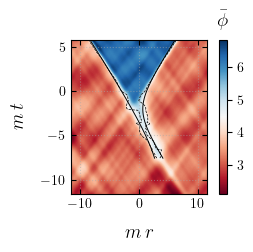

/Users/dalilapirvu/Desktop/paper_thermal/bubbles_codes/bubble_tools.py:316: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  #np.save('./data/bubble_data_original_2.npy', np.array([rr, ll, rrwallfit, llwallfit, ttwallfit-tcen, simulation, ext]))


In [31]:
if True:
    winsize = 150

    fullreal, sim, tdecay, outcome = np.load(clean_sim_location(*exp_params, sim))
    real = fullreal[0]
    nT, nN = np.shape(real)

    t_centre, x_centre = find_nucleation_center(real, phieq, crit_thresh, crit_rad)
    tl_stop, tr_stop = max(0, t_centre - winsize), min(nT, t_centre + winsize//2)
    xl_stop, xr_stop = max(0, x_centre - winsize), min(nN, x_centre + winsize)

#    real = gaussian_filter(real, nL/1000, mode='nearest')
    simulation = real[tl_stop:tr_stop, xl_stop:xr_stop]
    tcen, xcen = find_nucleation_center(simulation, phieq, crit_thresh, crit_rad)

    betas = np.zeros((len(ampList)))
    for vv, v_size in enumerate(ampList):
        betas[vv] = get_COM_velocity(simulation, phieq, crit_thresh, crit_rad, v_size, dx, lamb, tcen, xcen, True)


In [33]:
%run './bubbles_codes/bubble_tools.py'

(3, 502, 507)


/Users/dalilapirvu/Desktop/paper_thermal/bubbles_codes/bubble_tools.py:183: RuntimeWarning: invalid value encountered in sqrt
  hyperbola  = lambda t, d, e, f: - np.sqrt(f + e*t + t**2.) + d
/Users/dalilapirvu/Desktop/paper_thermal/bubbles_codes/bubble_tools.py:172: RuntimeWarning: invalid value encountered in sqrt
  hyperbola  = lambda t, a, b, c: np.sqrt(c + b*t + t**2.) + a


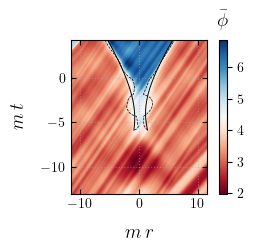

/Users/dalilapirvu/Desktop/paper_thermal/bubbles_codes/bubble_tools.py:317: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  #np.save('./data/bubble_data_deboosted_2.npy', np.array([rr, ll, rrwallfit, llwallfit, ttwallfit-tcen, simulation, ext]))


In [34]:
if True:
    sim, fullreal, totbeta = np.load(rest_sim_location(*exp_params, sim))
    print(np.shape(fullreal))

    real = fullreal[0]
    nT, nN = np.shape(real)

    t_centre, x_centre = find_nucleation_center(real, phieq, crit_thresh, crit_rad)
    tl_stop, tr_stop = max(0, t_centre - winsize), min(nT, t_centre + winsize//2)
    xl_stop, xr_stop = max(0, x_centre - winsize), min(nN, x_centre + winsize)

    simulation = real[tl_stop:tr_stop, xl_stop:xr_stop]
    tcen, xcen = find_nucleation_center(simulation, phieq, crit_thresh, crit_rad)

    betas = np.zeros((len(ampList)))
    for vv, v_size in enumerate(ampList):
        betas[vv] = get_COM_velocity(simulation, phieq, crit_thresh, crit_rad, v_size, dx, lamb, tcen, xcen, True)
